In [26]:
import h5py
import numpy as np
import pandas as pd
from tools.geometry import *

import plotly.graph_objs as go
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.optimize import curve_fit

import seaborn as sns

hdf5_file_i =[0]*10

In [27]:
hdf5_file_i 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
for i in range(10) : 
    # Specify the path to your HDF5 file
    hdf5_file_i[i]= 'datasets_hit_time/sim_mode_3_dataset_'+str(i)+'_events.h5'

track_direction = np.array([0,1,1])
vector_length = 3  # You can adjust this length
detector = generate_detector('cyl_geom_config.json')
len(detector.all_points)
# Generate cylinder points
xs, ys, zs = detector.all_points[:,0], detector.all_points[:,1], detector.all_points[:,2]

In [29]:
df_i=[0]*10
for i in range(10):
    # Open the HDF5 file in read-only mode
    with h5py.File(hdf5_file_i[i], 'r') as f:
        # Load individual datasets into NumPy arrays
        event_hits_index = np.array(f['event_hits_index'][:])
        evt_id = np.array(f['evt_id'][:])
        hit_charge = np.array(f['hit_charge'][:])
        hit_pmt = np.array(f['hit_pmt'][:])
        hit_time = np.array(f['hit_time'][:])
        hit_position = np.array(f['hit_position'][:])
        positions = np.array(f['positions'][:])

        # Convert hit_position to list of tuples
        hit_pos = list(map(tuple, hit_position))


        # Determine the number of hits
        num_hits = len(hit_charge)

        #Create a dictionary with each feature as a column
        data_dict = {
            'event_hits_index': np.full(num_hits, event_hits_index[0]),  # Broadcast to match the number of hits
            'evt_id': np.full(num_hits, evt_id[0]),  # Broadcast to match the number of hits
            'hit_charge': hit_charge,
            'hit_pmt': hit_pmt,
            'hit_time': hit_time,
            'hit_x' : xs[hit_pmt],
            'hit_y' : ys[hit_pmt],
            'hit_z' : zs[hit_pmt],
            'hit_position' : hit_pos,
            'pos_x': np.full(num_hits, positions[0, 0, 0]),  # Broadcast single position x value
            'pos_y': np.full(num_hits, positions[0, 0, 1]),  # Broadcast single position y value
            'pos_z': np.full(num_hits, positions[0, 0, 2])  # Broadcast single position z value
        }
        print(f['positions'][:])

        # Create a pandas DataFrame
        df_i[i] = pd.DataFrame(data_dict)

[[[ 3.6  0.  -2.5]]]
[[[ 3.1176915  1.8       -2.5      ]]]
[[[ 1.8        3.1176915 -2.5      ]]]
[[[ 2.2043642e-16  3.5999999e+00 -2.5000000e+00]]]
[[[-1.8        3.1176915 -2.5      ]]]
[[[-3.1176915  1.8       -2.5      ]]]
[[[-3.5999999e+00  4.4087284e-16 -2.5000000e+00]]]
[[[-3.1176915 -1.8       -2.5      ]]]
[[[-1.8       -3.1176915 -2.5      ]]]
[[[-6.613093e-16 -3.600000e+00 -2.500000e+00]]]


In [30]:
df_i[0]['hit_time']

0     18.255404
1     18.255404
2     18.255404
3     18.255404
4     18.255404
        ...    
60    14.305208
61    14.067487
62    13.879778
63    13.744130
64    13.744130
Name: hit_time, Length: 65, dtype: float32

In [31]:
trace_hit_pos_i = []
for i in range(10) : 
    hit_x , hit_y , hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    # Create a trace
    trace_hit_pos_i.append( go.Scatter3d(
        x = hit_x,
        y = hit_y,
        z = hit_z,
        mode='markers',
        marker=dict(
            size=3,
            color= i, # Use 'i' as a categorical color index
            opacity=0.8,
            # Add color bar
        ),
    name='Emission '+str(i)
    ) )
# Create a trace for tank
trace_tank = go.Scatter3d(
    x = xs,
    y = ys,
    z = zs,
    mode='markers',
    marker=dict(
        size=0.5,
        color= 'blue',  # Use the count of hits as color
        opacity=0.8,
          # Add color bar
    ),
    name='Tank'  # Set a name for this trace in the legend

)
# Create a trace for the point to highlight in red
highlight_trace = go.Scatter3d(
    x = [0],  # Wrap the value in a list or array
    y= [0],  # Wrap the value in a list or array
    z= [0],  # Wrap the value in a list or array
    mode='markers',
    marker=dict(
        size=3,
        color='red',  # Set the color to red
        opacity=1.0,
    ),
    name='Vtx'  # Set a name for this trace in the legend

)

track_origin = [0, 0, 0]
# Compute the end point of the vector
track_end = track_origin + vector_length * track_direction
# Create a trace for the direction vector
trace_vector = go.Scatter3d(
    x=[track_origin[0], track_end[0]],
    y=[track_origin[1], track_end[1]],
    z=[track_origin[2], track_end[2]],
    mode='lines',
    line=dict(
        color='red',
        width=4
    ),
    name='Track Direction'
)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    legend=dict(
        x=0.85,  # Adjust the x position of the legend
        y=0.95,  # Adjust the y position of the legend
        bgcolor='rgba(255, 255, 255, 0.5)',  # Adjust the background color and transparency
        bordercolor='rgba(0, 0, 0, 0.5)',  # Adjust the border color and transparency
        borderwidth=2  # Adjust the border width
    )
)
# Create figure
fig = go.Figure(data= [highlight_trace , trace_vector, trace_tank] + trace_hit_pos_i , layout=layout)
# Display the interactive plot
fig.show()

In [32]:
max_r = 0
max_z = max(abs(zs))

nPMTs_type0 = len(xs)

event_display_xy = []
for i in range(nPMTs_type0):
    max_r = max(max_r, math.sqrt(xs[i]**2 + ys[i]**2))

barrelCut = max_z - 0.05
for i in range(nPMTs_type0):
    # rotation for event display
    x = -xs[i]
    y = ys[i]
    z = zs[i]
    pmt_xy = []
    if abs(z) < barrelCut:  # barrel
        th = math.atan2(y, x)
        pmt_xy.append(-max_r * th)
        pmt_xy.append(z)
    elif z > barrelCut:  # top
        pmt_xy.append(-y)
        pmt_xy.append(max_z + max_r - x)
    else:  # bot
        pmt_xy.append(-y)
        pmt_xy.append(-max_z - max_r + x)
    event_display_xy.append(pmt_xy)

# Create lists to store x and y coordinates
x_coords = []
y_coords = []

# Extract x and y coordinates from event_display_xy
for pmt_xy in event_display_xy:
    x_coords.append(pmt_xy[0])
    y_coords.append(pmt_xy[1])

x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

In [33]:
max_r, max_z

(4.0, 3.0)

In [34]:
hit_pmt = df_i[0]['hit_pmt']

# Extract underlying NumPy array from pandas Series
hit_pmt_array = hit_pmt.to_numpy(dtype=int).flatten()
hit_pmt_array

array([3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3898, 3899,
       3913, 3914, 4064, 4084, 4230, 4254, 4397, 4423, 4563, 4593, 4730,
       4762, 4897, 4931, 5064, 5100, 5231, 5269, 5398, 5438, 5565, 5607,
       5900, 5944, 6235, 6281, 6402, 6450, 6570, 6618, 6735, 6780, 6884,
       7026, 7068, 7161, 7289, 7328, 7410, 7524, 7560, 7631, 7665, 7855,
       7911, 7989, 8082, 8122, 8176, 8223, 8272, 8292, 8315, 8318])

In [35]:
x_coords

array([-12.56637061, -12.41677096, -12.26717131, ...,   0.1119591 ,
         0.18115362,  -0.        ])

/tmp/ipykernel_139673/3244084181.py:25: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



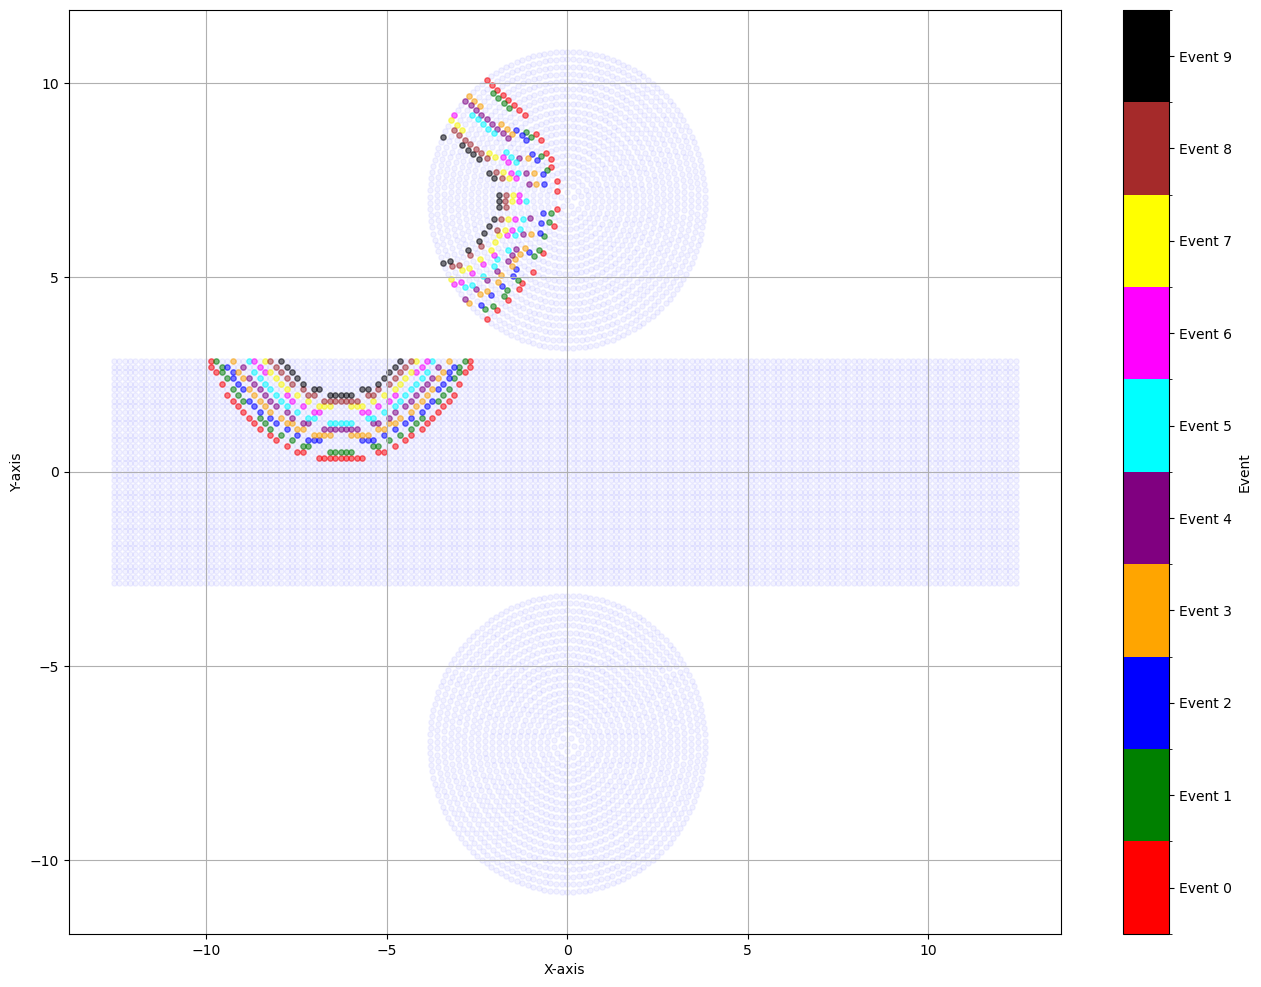

In [36]:
import matplotlib.colors as mcolors

def ring_vizualization_2d():
    # Plot the figure
    plt.figure(figsize=(16, 12))
    plt.scatter(x_coords, y_coords,s=15, c='blue',  alpha=0.05)
    # Define a list of colors for each event
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'black']

    
    for i in range(10): 
        hit_pmt = df_i[i]['hit_pmt'] # this gets the pmt digit hit
        hit_pmt=hit_pmt.to_numpy(dtype=int)
        plt.scatter(x_coords[hit_pmt], y_coords[hit_pmt],s=15,c=colors[i],   alpha=0.5)
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    # Add colors bar
    #Create a colormap with specified colors
    cmap = mcolors.ListedColormap(colors)

    # Add color bar with event numbers as labels
    norm = mcolors.BoundaryNorm(np.arange(0, 11), cmap.N, clip=True)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=np.arange(0.5, 10.5), boundaries=np.arange(-0.5, 10.5))
    cbar.set_label('Event')
    cbar.set_ticklabels([f'Event {i}' for i in range(10)])


    plt.show()
ring_vizualization_2d()

In [37]:
def find_origin(points , track_direction) :
    """ For a collection of photons calculate the list of ID of the PMTs that get hit."""
    ray_origin = [0, 0, 0]
    device = torch.device("cpu")

    # Convert NumPy arrays to PyTorch tensors and move to "mps" device
    ray_origin_torch = torch.tensor(ray_origin, dtype=torch.float32, device=device).unsqueeze(0) 
    track_direction_torch = torch.tensor(track_direction, dtype=torch.float32, device=device).unsqueeze(0) 
    points_torch = torch.tensor(points, dtype=torch.float32, device=device)

    # Calculate vectors from ray origin to all points
    vectors_to_points = points_torch - ray_origin_torch[:, None, :]

    # Project all vectors onto the ray direction using einsum
    dot_products_numerator = torch.einsum('ijk,ik->ij', vectors_to_points, track_direction_torch)
    dot_products_denominator = torch.sum(track_direction_torch * track_direction_torch, dim=-1)

    # Calculate t_values
    t_values = dot_products_numerator / dot_products_denominator[:, None]

    # Calculate the points on the ray closest to the given points
    closest_points_on_ray = ray_origin_torch[:, None, :] + t_values[:, :, None] * track_direction_torch[:, None, :]

    # Calculate the Euclidean distances between all points and their closest points on the ray
    distances_proj = torch.norm(points_torch - closest_points_on_ray, dim=2)

    # find origin point
    distance = distances_proj/np.tan(np.radians(40))
    origin_ray = closest_points_on_ray - distance[:, :, None]*track_direction_torch[:, None, :]/np.sqrt(dot_products_denominator[:, None])

    
    return origin_ray.cpu().numpy()


In [38]:
#defining hits of an event as point
x_values, y_values, z_value  = df_i[5]['hit_x'], df_i[5]['hit_y'], df_i[5]['hit_z']

hit_points = np.column_stack((x_values, y_values, z_value ))
hit_points

array([[ 2.98920374e-01,  3.98881519e+00,  1.24390244e+00],
       [ 1.49564777e-01,  3.99720282e+00,  1.24390244e+00],
       [ 2.44929360e-16,  4.00000000e+00,  1.24390244e+00],
       [-1.49564777e-01,  3.99720282e+00,  1.24390244e+00],
       [-2.98920374e-01,  3.98881519e+00,  1.24390244e+00],
       [ 8.90083736e-01,  3.89971165e+00,  1.39024390e+00],
       [ 7.43646429e-01,  3.93026589e+00,  1.39024390e+00],
       [-7.43646429e-01,  3.93026589e+00,  1.39024390e+00],
       [-8.90083736e-01,  3.89971165e+00,  1.39024390e+00],
       [ 1.17902070e+00,  3.82229122e+00,  1.53658537e+00],
       [-1.17902070e+00,  3.82229122e+00,  1.53658537e+00],
       [ 1.46136410e+00,  3.72349499e+00,  1.68292683e+00],
       [-1.46136410e+00,  3.72349499e+00,  1.68292683e+00],
       [ 1.59956810e+00,  3.66624902e+00,  1.82926829e+00],
       [-1.59956810e+00,  3.66624902e+00,  1.82926829e+00],
       [ 1.73553496e+00,  3.60387547e+00,  1.97560976e+00],
       [-1.73553496e+00,  3.60387547e+00

In [39]:
def reconstructed(i):
    #defining hits of an event as point
    x_values, y_values, z_value  = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']

    hit_points = np.column_stack((x_values, y_values, z_value )) 
    return find_origin(hit_points, track_direction)[0]   

/tmp/ipykernel_139673/3897536858.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




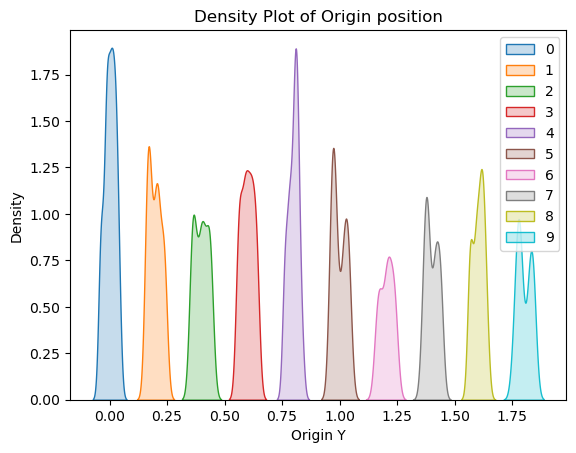

In [40]:
# Create density plot of hit times
sns.kdeplot([reconstructed(i)[:,1] for i in range(10)], shade=True, color="blue")

# Add labels and title
plt.xlabel('Origin Y')
plt.ylabel('Density')
plt.title('Density Plot of Origin position')

plt.show()

/tmp/ipykernel_139673/2919402489.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




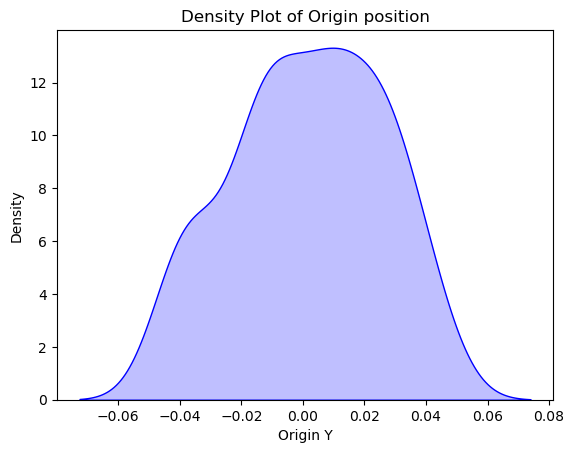

In [41]:
# Create density plot of hit times
sns.kdeplot(reconstructed(0)[:,1], shade=True, color="blue")

# Add labels and title
plt.xlabel('Origin Y')
plt.ylabel('Density')
plt.title('Density Plot of Origin position')

plt.show()

In [42]:
trace_hit_pos_i = []
trace_org_pos_i=[]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'black']


for i in range(10) : 
    hit_x , hit_y , hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    # Create a trace
    trace_org_pos_i.append( go.Scatter3d(
        x = reconstructed(i)[:,0],
        y = reconstructed(i)[:,1],
        z = reconstructed(i)[:,2],
        mode='markers',
        marker=dict(
            size=3,
            color= colors[i],  # Use the count of hits as color
            colorscale='Viridis',
            
            opacity=0.8,
            # Add color bar
        ),
    name='Emission '+str(i)
    ) )







all_traces = [highlight_trace, trace_vector, trace_tank] + trace_org_pos_i +trace_hit_pos_i


# Create the figure
fig = go.Figure(data=all_traces, layout=layout)# Display the interactive plot
fig.show()

# Plot with time

In [43]:
trace_hit_pos_i = []
for i in range(10) : 
    hit_x , hit_y , hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    hit_time = df_i[i]['hit_time']
    # Create a trace
    trace_hit_pos_i.append( go.Scatter3d(
        x = hit_x,
        y = hit_y,
        z = hit_z,
        mode='markers',
        marker=dict(
            size=3,
            color=hit_time,  # Color by 'hit_time'
            coloraxis='coloraxis',
            colorbar=dict(title='Hit Time', len=0.75),  # Show color bar with title
            opacity=0.8,
        )
    ) )






# Create figure
fig = go.Figure(data= [highlight_trace , trace_vector, trace_tank] + trace_hit_pos_i , layout=layout)
# Display the interactive plot
fig.show()

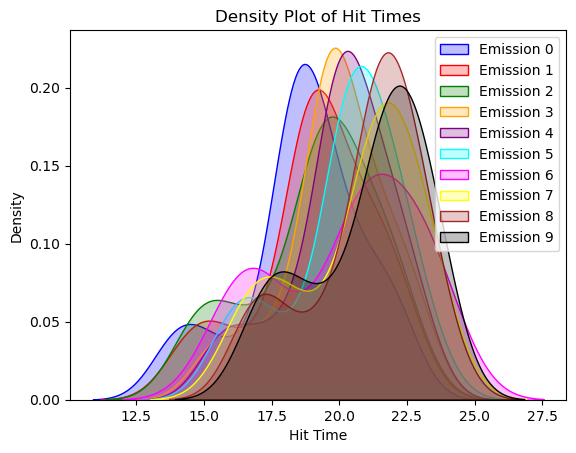

In [44]:
# List of colors for each dataset
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'black']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each dataset's hit_time with a different color
for i in range(10):
    sns.kdeplot(data=df_i[i]['hit_time'], fill=True, color=colors[i], ax=ax, label=f'Emission {i}')

# Add labels and title
ax.set_xlabel('Hit Time')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Hit Times')

# Show legend with dataset labels
ax.legend()

plt.show()

In [45]:
# Combine all hit times to determine the overall range
all_hit_times = np.concatenate([df_i[i]['hit_time'] for i in range(10)])
# Determine global min and max of hit times
global_min = all_hit_times.min()
global_max = all_hit_times.max()

In [46]:
# Initialize an empty list to store traces
trace_hit_pos_i = []

# Assuming you have already defined df_i, global_min, and global_max

# Loop through each dataset in df_i
for i in range(10):
    hit_x, hit_y, hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    hit_time = df_i[i]['hit_time']
    
    # Create a trace for each dataset
    trace = go.Scatter3d(
        x=hit_x,
        y=hit_y,
        z=hit_z,
        mode='markers',
        marker=dict(
            size=3,
            color=hit_time,  # Color by 'hit_time'
            colorscale='Viridis',
            cmin=global_min,  # Set the global minimum for colorscale
            cmax=global_max,  # Set the global maximum for colorscale
            colorbar=dict(title='Hit Time', len=0., y=0.45,  # Move the color bar down
                yanchor='middle'),
            opacity=0.8
        ),
        showlegend=False  # Disable legend for each trace
    )
    
    trace_hit_pos_i.append(trace)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    legend=dict(
        x=1.02,  # Adjust the x position of the legend
        y=0.9,   # Adjust the y position of the legend
        bgcolor='rgba(255, 255, 255, 0.5)',  # Adjust the background color and transparency
        bordercolor='rgba(0, 0, 0, 0.5)',  # Adjust the border color and transparency
        borderwidth=2  # Adjust the border width
    ),
    
)

# Create figure
fig = go.Figure(data= trace_hit_pos_i + [highlight_trace, trace_vector, trace_tank], layout=layout)

# Update layout with unified colorscale (if necessary)
fig.update_layout(
    coloraxis_colorbar=dict(title='Hit Time', len=0.75)
)

# Display the interactive plot
fig.show()

# Analysis of reconstructed position

In [47]:
reconstructed_distance_diff= [np.linalg.norm(reconstructed(i)- 0.2*i*track_direction, axis=1) for i in range(10)]

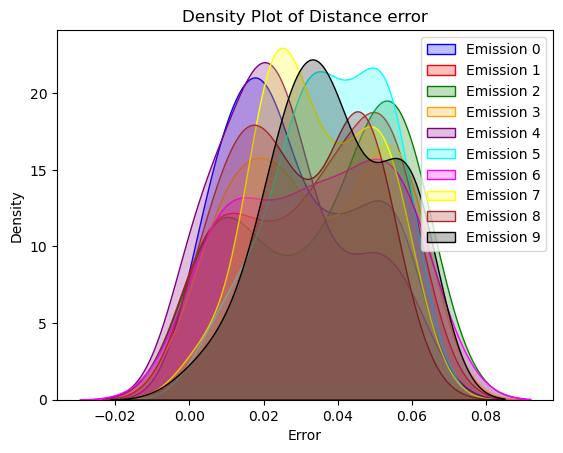

In [48]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each dataset's hit_time with a different color
for i in range(10):
    sns.kdeplot(data=reconstructed_distance_diff[i], fill=True, color=colors[i], ax=ax, label=f'Emission {i}')

# Add labels and title
ax.set_xlabel('Error')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Distance error')

# Show legend with dataset labels
ax.legend()

plt.show()

In [49]:
# Combine all hit times to determine the overall range
all_dist_err = np.concatenate([reconstructed_distance_diff[i] for i in range(10)])
# Determine global min and max of hit times
global_min_err = all_dist_err.min()
global_max_err = all_dist_err.max()

# Initialize an empty list to store traces
trace_hit_pos_i = []

# Assuming you have already defined df_i, global_min, and global_max

# Loop through each dataset in df_i
for i in range(10):
    hit_x, hit_y, hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    err = reconstructed_distance_diff[i]
    
    # Create a trace for each dataset
    trace = go.Scatter3d(
        x=hit_x,
        y=hit_y,
        z=hit_z,
        mode='markers',
        marker=dict(
            size=3,
            color=err,  # Color by 'hit_time'
            coloraxis='coloraxis',
            colorbar=dict(title='Distance Error', len=0.75, y=0.45, yanchor='middle'),  # Move the color bar down
            opacity=0.8
        ),
        showlegend=False  # Disable legend for each trace
    )
    
    trace_hit_pos_i.append(trace)



# Create figure
fig = go.Figure(data= trace_hit_pos_i + [highlight_trace, trace_vector, trace_tank], layout=layout)



# Display the interactive plot
fig.show()

In [50]:
# Combine all hit times to determine the overall range
all_dist_err = np.concatenate([reconstructed_distance_diff[i] for i in range(10)])
# Determine global min and max of hit times
global_min_err = all_dist_err.min()
global_max_err = all_dist_err.max()

# Initialize an empty list to store traces
trace_hit_pos_i = []

# Assuming you have already defined df_i, global_min, and global_max

# Loop through each dataset in df_i
for i in range(10):
    hit_x, hit_y, hit_z = df_i[i]['hit_x'], df_i[i]['hit_y'], df_i[i]['hit_z']
    err = reconstructed_distance_diff[i]
    
    # Create a trace for each dataset
    trace = go.Scatter3d(
        x=hit_x,
        y=hit_y,
        z=hit_z,
        mode='markers',
        marker=dict(
            size=3,
            color=err,  # Color by 'hit_time'
            coloraxis='coloraxis',
            colorbar=dict(title='Distance Error', len=0.75, y=0.45, yanchor='middle'),  # Move the color bar down
            opacity=0.8
        ),
        showlegend=False  # Disable legend for each trace
    )
    
    trace_hit_pos_i.append(trace)



# Create figure
fig = go.Figure(data= trace_hit_pos_i + [highlight_trace, trace_vector, trace_tank], layout=layout)



# Display the interactive plot
fig.show()